In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/santander-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/santander-dataset/train.csv
/kaggle/input/santander-dataset/test.csv


In [2]:
def load_data():
    df_train = pd.read_csv('/kaggle/input/santander-dataset/train.csv')
    df_test = pd.read_csv('/kaggle/input/santander-dataset/test.csv')
    
    return df_train,df_test

In [3]:
#Label encoding selected categorical columns, while leaving other columns as it is
from sklearn import preprocessing

def label_encoding(sel_cat,inpX):
    for col in sel_cat:
        if col in inpX.columns:
            le = preprocessing.LabelEncoder()
            le.fit(list(inpX[col].astype(str).values))
            inpX[col] = le.transform(list(inpX[col].astype(str).values))
    return inpX


In [4]:
# Returns list of categorical columns, and part of dataset with only categorical columns
def categorical_cols(input_df):
    # Selecting numeric columns in df_train
    print(input_df.select_dtypes('object').columns)
    sel_train = input_df.select_dtypes('object').columns.values
    #print(type(sel_train))

    train = input_df[sel_train]
    #print(train.describe())
    return sel_train, train

In [5]:
from sklearn.model_selection import train_test_split

#features = sel_features+num_id+sel_cards
#train = df_train[features]
def balanced_sampling(input_df, factor): 
    
    train = numeric_cols(input_df)
    y= train['target']
    # Selecting target 1 and target 0  
    X_target = train[train.target==1]
    X_notarget= train[train.target==0]
    total_target = X_target.shape
    print("Target Size : ",total_target[1],total_target[0])
    scale_factor = factor
    X_notarget1=X_notarget.sample(scale_factor*total_target[0])
    X=pd.concat([X_target,X_notarget1], ignore_index=True)
    y= X['target']
    print(X.shape)
    print(X.sample(10))

    #dropping target column from X
    X.drop(["target"],axis=1,inplace=True)
    
    
    ### Train-test split with Stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.25)
    return X_train, X_test, y_train, y_test

In [6]:
def numeric_cols(input_df):
    # Selecting numeric columns in df_train
    print(input_df.select_dtypes('number').columns)
    sel_train = input_df.select_dtypes('number').columns.values
    print(type(sel_train))

    train = input_df[sel_train]
    print(train.describe())
    return train

In [7]:
def preprocess(inp):
# Filling 0.0 in place of NaN
    inp.fillna(0.0, inplace=True)
    inp.sample(10)
    return inp 

In [8]:
df_train,df_test = load_data()
print(f'Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns.')
print(f'Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns.')

Train dataset has 200000 rows and 202 columns.
Test dataset has 200000 rows and 201 columns.


In [9]:
X_train, X_test, y_train, y_test = balanced_sampling(df_train,3)

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)
<class 'numpy.ndarray'>
              target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualize_class_distribution(y_before, y_after, class_labels=None):
    """
    Visualize class distribution before and after balanced sampling.
    
    Parameters:
    - y_before: Labels before balancing (e.g., df_train['label'])
    - y_after: Labels after balancing (e.g., y_train)
    - class_labels: Optional list of class names for labeling
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot before balancing
    sns.countplot(x=y_before, ax=axes[0], palette="viridis")
    axes[0].set_title("Before Balanced Sampling")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")
    if class_labels:
        axes[0].set_xticklabels(class_labels)

    # Plot after balancing
    sns.countplot(x=y_after, ax=axes[1], palette="magma")
    axes[1].set_title("After Balanced Sampling")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")
    if class_labels:
        axes[1].set_xticklabels(class_labels)

    plt.tight_layout()
    plt.show()


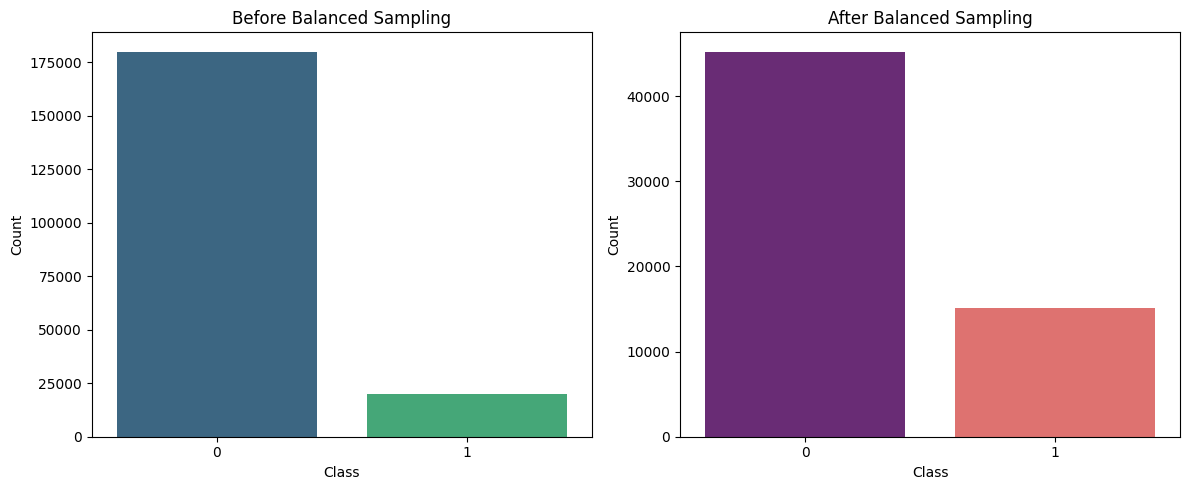

In [31]:
# y_before uses original target column before balancing
y_before = df_train['target']

# y_after is the training label after applying balanced_sampling
y_after = y_train

# Visualize class distribution before and after balancing
visualize_class_distribution(y_before, y_after)


In [10]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [12]:
pip install cupy-cuda11x  # Match x with your CUDA version, e.g., 117 for CUDA 11.7


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 MB 17.4 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
# NO NEED for cupy
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Custom TQDM-wrapped GridSearchCV
class TQDMGridSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = 1
        for key in self.param_grid:
            n_candidates *= len(self.param_grid[key])
        with tqdm(total=n_candidates, desc="GridSearchCV") as pbar:
            self._pbar = pbar
            return super().fit(X, y, **fit_params)

    def _run_search(self, evaluate_candidates):
        def wrapped(candidate_params):
            out = evaluate_candidates(candidate_params)
            self._pbar.update(len(candidate_params))
            return out
        super()._run_search(wrapped)

# Use XGBClassifier with GPU
model = xgb.XGBClassifier(
    tree_method='hist',  # fast histogram method (CPU/GPU-compatible)
    device='cuda',       # force use of GPU
    random_state=42,
    verbosity=1
)

param_grid = {
    'n_estimators': [2000, 4000],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'subsample': [0.8],
    'colsample_bytree': [1],
    'gamma': [0, 1]
}

# Wrap GridSearchCV
gbm = TQDMGridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=0)

# Use original NumPy arrays
gbm.fit(X_train, y_train)


GridSearchCV:   0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [22:49:28] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
GridSearchCV: 100%|██████████| 16/16 [07:13<00:00, 27.11s/it]


TQDMGridSearchCV(cv=3,
                 estimator=XGBClassifier(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, device='cuda',
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate...
                                         max_delta_step=None, max_depth=None,
                                         max_leaves=None, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=None,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=42, ...),
                 n_jobs=-1,
                 param_grid={'colsample_bytree': [1], 'gamma': [0, 1],
                             'learning_rate': [0.01, 0.05], 'max_depth': [3, 4],
                             'n_estimators': [2000, 4000], 'subsample': [0.8]})

In [15]:
# Print best parameters and score
print("Best Parameters:", gbm.best_params_)
print("Best Cross-Validation Score:", gbm.best_score_)


Best Parameters: {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.8}
Best Cross-Validation Score: 0.852721663847149


In [19]:
y_pred=gbm.predict(X_test)

In [20]:
from sklearn import metrics
def eval2(y_test,y_pred):
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return 0

In [21]:
eval2(y_test,y_pred)

Accuracy: 0.8494875111951438


0

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def performance_analysis(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print metrics
    print("Confusion Matrix:")
    print(cm)
    print("\nAccuracy Score:", acc)
    print("\nClassification Report:")
    print(report)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()


Confusion Matrix:
[[14280   794]
 [ 2231  2793]]

Accuracy Score: 0.8494875111951438

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15074
           1       0.78      0.56      0.65      5024

    accuracy                           0.85     20098
   macro avg       0.82      0.75      0.78     20098
weighted avg       0.84      0.85      0.84     20098



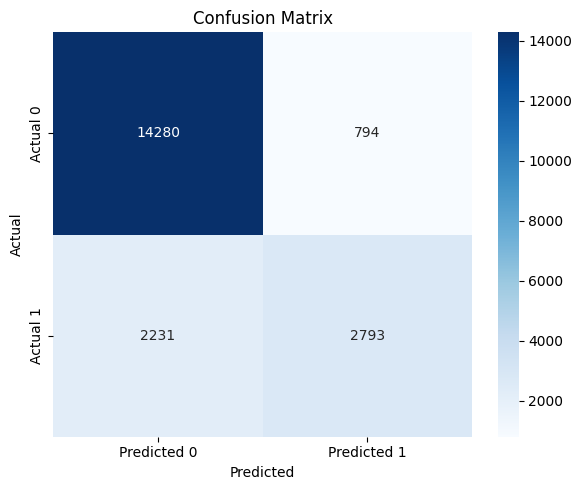

In [28]:
performance_analysis(y_test, y_pred)
